
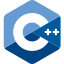
<br>

<div style="text-align:center; font-size:200%;">
  <b>The Pimple Idiom</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 09 The Pimple Idiom.ipynb -->
<!-- slides/module_470_cpp_patterns/topic_100_pimpl.cpp -->


## Problem

- The implementation details of a class are part of the interface
- Changes to the implementation require a recompilation of all users of the
  class
  - Even for private methods (because of overload resolution)


- The implementation details are outsourced to a private class
- The public class only contains a pointer to the private class
- The public class delegates all method calls to the private class
- The private class is defined in the `cpp` file


File `WidgetV1.h`:

```cpp
#ifndef WIDGETV1_H
#define WIDGETV1_H
#include <memory>

namespace widget_v1 {
class WidgetV1 {
public:
    WidgetV1();
    ~WidgetV1();

    void PrintWidget() const;

    int GetState() const;
    void SetState(int state);

private:
    class Impl;
    std::unique_ptr<Impl> pImpl;
};
} // namespace widget_v1

#endif // WIDGETV1_H
```


File `WidgetV1.cpp`:

In [ ]:
#include "WidgetV1.h"

#include <iostream>

In [ ]:
class widget_v1::WidgetV1::Impl {
public:
    void PrintWidget() { std::cout << "Impl::PrintWidget(): " << state_ << "\n"; }

    int GetState() const { return state_; }

    void SetState(int state) { state_ = state; }

private:
    int state_{};
};

In [ ]:
namespace widget_v1 {
widget_v1::WidgetV1::WidgetV1() : pImpl{std::make_unique<Impl>()} {}
} // namespace widget_v1

In [ ]:
namespace widget_v1 {
WidgetV1::~WidgetV1() = default;
}

In [ ]:
void widget_v1::WidgetV1::PrintWidget() const { pImpl->PrintWidget(); }

In [ ]:
void widget_v1::WidgetV1::SetState(int state) { pImpl->SetState(state); }

In [ ]:
int widget_v1::WidgetV1::GetState() const { return pImpl->GetState(); }

In [ ]:
using widget_v1::WidgetV1;

WidgetV1 w;
w.PrintWidget();
w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();

In [ ]:
using widget_v1::WidgetV1;
const WidgetV1 w;
w.PrintWidget();
// w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();


### Advantages

- The implementation details are not part of the interface
- Changes to the implementation do not require a recompilation of the users
  of the class


### Problems

- Runtime overhead
  - Storage for pointers
  - Indirect access to data
  - Data stored on the heap instead of the stack
     - This is typically the most significant overhead
- Increased maintenance and development effort
- The class is not copyable
- `Const-ness` is not correctly propagated to the `pImpl` pointer


File `WidgetV2.h`:

```cpp
#ifndef WIDGETV2_H
#define WIDGETV2_H
#include <memory>

namespace widget_v2 {
class WidgetV2 {
public:
    WidgetV2();
    ~WidgetV2();

    void PrintWidget() const;

    int GetState() const;
    int& GetState();
    void SetState(int state);

private:
    class Impl;
    std::unique_ptr<Impl> pImpl;
};
} // namespace widget_v2

#endif // WIDGETV2_H
```


File `WidgetV2.cpp`:

In [ ]:
#include "WidgetV2.h"

#include <iostream>

In [ ]:
class widget_v2::WidgetV2::Impl {
public:
    void PrintWidget() const {
        std::cout << "Impl::PrintWidget() const: " << state_ << "\n";
    }

    void PrintWidget() { std::cout << "Impl::PrintWidget(): " << state_ << "\n"; }

    int GetState() const {
        std::cout << "<Impl::GetState() const -> " << state_ << "> ";
        return state_;
    }

    int& GetState() {
        std::cout << "<Impl::GetState() -> " << state_ << "> ";
        return state_;
    }

    void SetState(int state) { state_ = state; }

private:
    int state_{};
};

In [ ]:
namespace widget_v2 {
WidgetV2::WidgetV2() : pImpl{std::make_unique<Impl>()} {}
} // namespace widget_v2

In [ ]:
namespace widget_v2 {
WidgetV2::~WidgetV2() = default;
}

In [ ]:
void widget_v2::WidgetV2::PrintWidget() const { pImpl->PrintWidget(); }

In [ ]:
void widget_v2::WidgetV2::SetState(int state) { pImpl->SetState(state); }

In [ ]:
int widget_v2::WidgetV2::GetState() const { return pImpl->GetState(); }

In [ ]:
int& widget_v2::WidgetV2::GetState() { return pImpl->GetState(); }

In [ ]:
using widget_v2::WidgetV2;

WidgetV2 w;
w.PrintWidget();
w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();

In [ ]:
using widget_v2::WidgetV2;
const WidgetV2 w;
w.PrintWidget();
// w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();


- It is possible to propagate the `const` qualification to the `pImpl` pointer
- However, the corresponding template is not defined in the C++ standard
- A corresponding implementation is included as a header in the code


File `WidgetV3.h`:

```cpp
#ifndef WIDGETV3_H
#define WIDGETV3_H
#include <memory>
#include "propagate_const.h"

namespace widget_v3 {
class WidgetV3 {
public:
    WidgetV3();
    ~WidgetV3();

    void PrintWidget() const;

    int GetState() const;
    int& GetState();
    void SetState(int state);

private:
    class Impl;
    std::experimental::propagate_const<std::unique_ptr<Impl>> pImpl;
};
} // namespace widget_v3

#endif // WIDGETV3_H
```

In [ ]:
#include "WidgetV3.h"


File `WidgetV3.cpp`:

In [ ]:
#include "WidgetV3.h"

#include <iostream>

In [ ]:
namespace widget_v3 {
class WidgetV3::Impl {
public:
    void PrintWidget() const {
        std::cout << "Impl::PrintWidget() const: " << state_ << "\n";
    }

    void PrintWidget() { std::cout << "Impl::PrintWidget(): " << state_ << "\n"; }

    int GetState() const {
        std::cout << "<Impl::GetState() const -> " << state_ << "> ";
        return state_;
    }

    int& GetState() {
        std::cout << "<Impl::GetState() -> " << state_ << "> ";
        return state_;
    }

    void SetState(int state) { state_ = state; }

private:
    int state_{};
};
} // namespace widget_v3

In [ ]:
namespace widget_v3 {
WidgetV3::WidgetV3() : pImpl{std::make_unique<Impl>()} {}
} // namespace widget_v3

In [ ]:
namespace widget_v3 {
WidgetV3::~WidgetV3() = default;
}

In [ ]:
void widget_v3::WidgetV3::PrintWidget() const { pImpl->PrintWidget(); }

In [ ]:
void widget_v3::WidgetV3::SetState(int state) { pImpl->SetState(state); }

In [ ]:
int widget_v3::WidgetV3::GetState() const { return pImpl->GetState(); }

In [ ]:
int& widget_v3::WidgetV3::GetState() { return pImpl->GetState(); }

In [ ]:
using widget_v3::WidgetV3;

WidgetV3 w;
w.PrintWidget();
w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();

In [ ]:
using widget_v3::WidgetV3;
const WidgetV3 w;
w.PrintWidget();
// w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();